<a href="https://colab.research.google.com/github/soumyajoykundu/Applied-Machine-Learning-2025/blob/main/Assignments/Project/Code%20files/SonicShield_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **AML Project**

**Team AudioSentinels**
1. Chandranath Bhattacharya -- MDS202318
2. Salokya Deb -- MDS202341
3. Soumyajoy Kundu -- MDS202349

**$$\text{SonicShield :
AI-Powered Guardian Against DeepFake Speech}$$**


This notebook is the second part of our work where we have explored statistical and machine learning techniques to tackle the problem. The following contents are covered here,
1. Statistical Analysis of Extracted Features
2. End-to-end Pipeline using benchmark ML model
  * Logistic Regression
  * Naive Bayes Classifier
  * SVM
  * Random Forest
  * XgBoost
3. Developing flask app for the best model

*Note*: The apps are developed on the model fine-tuned on our data under study.

Link to the data : [Kaggle](https://www.kaggle.com/datasets/birdy654/deep-voice-deepfake-voice-recognition/data)

### Importing Libraires

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost
import sklearn
import tensorflow as tf

# Set plot style for better visuals
plt.style.use('ggplot')
sns.set(font_scale=1.2)

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
print("GPU Available:", tf.test.is_gpu_available())
print("Colab Runtime:", "GPU" if tf.test.is_gpu_available() else "CPU")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: False
Colab Runtime: CPU


In [ ]:
data = pd.read_csv('data-balanced.csv')
data.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.345164,0.093046,1046.960347,1351.222347,1937.739342,0.030344,-306.160889,209.618683,3.123975,-8.502362,...,-3.370094,3.654903,7.627326,2.072889,-1.353799,-4.490911,-2.061353,8.683665,5.916374,REAL
1,0.413513,0.036381,2491.025441,3311.032008,4544.187898,0.057586,-393.681976,119.923439,-8.315945,11.332471,...,-5.724184,0.312014,-11.306483,-4.047928,0.661722,-5.848134,2.367994,-2.729973,-5.376225,FAKE
2,0.410590,0.005929,3457.983055,4609.747187,8337.391955,0.068554,-548.589783,143.375290,-14.965715,27.975279,...,-5.948756,-0.539809,0.640393,-3.083493,3.438543,1.779330,-7.211283,-4.343725,-1.700251,REAL
3,0.386347,0.057184,2546.720650,3192.849895,4914.535231,0.057082,-375.128845,128.916504,5.639764,18.972616,...,-12.798991,-2.167072,-0.652868,-4.042820,-7.214348,-4.725709,-6.279426,-7.225828,-5.566360,FAKE
4,0.482205,0.006853,5263.562287,4361.693848,10086.874270,0.164805,-452.446808,75.893646,-20.061228,49.314407,...,-7.387821,-8.310212,-4.881917,0.014762,-10.778668,-2.678419,-10.095864,-1.754935,-13.179572,REAL


In [ ]:
data.describe()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,...,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000
mean,0.421925,0.037894,2719.201373,3050.299988,4977.617722,0.070821,-382.562312,145.056311,-24.699932,21.311292,...,-2.242488,-4.439806,-1.657739,-2.107442,-2.606924,-1.641709,-3.320340,-3.117110,-2.754034,-4.427346
std,0.069392,0.028071,1066.754739,872.258653,2170.158448,0.039292,79.593413,36.188506,27.728976,22.480432,...,7.726415,6.614913,5.121732,5.347953,4.909579,5.627377,4.597079,4.976511,4.957660,5.478806
min,0.200353,0.000043,756.163229,1096.903152,1063.964279,0.015504,-1055.002197,-83.816765,-132.491104,-47.770000,...,-29.636639,-30.168062,-19.717999,-21.553347,-28.876045,-20.307486,-22.753056,-19.623880,-23.890470,-25.099829
25%,0.372330,0.015098,2062.875836,2569.289971,3448.144178,0.045749,-432.928848,120.522711,-35.550402,3.635681,...,-6.863236,-8.233070,-5.178427,-5.642066,-5.760252,-4.868709,-6.435052,-5.862841,-5.514250,-7.463774
50%,0.417708,0.031870,2579.963841,3055.863462,4683.958018,0.060237,-365.756241,145.970162,-19.164229,22.218458,...,-2.438328,-4.186015,-1.530670,-2.320350,-2.447045,-0.862829,-3.230387,-2.957088,-2.726495,-3.839427
75%,0.467741,0.054046,3283.857559,3581.271953,6211.301553,0.085149,-321.772781,168.321331,-6.235028,37.017731,...,2.349474,-0.266044,1.794835,1.569430,0.837690,2.043472,-0.293191,0.068411,0.495779,-0.787292
max,0.707202,0.168958,17685.006690,7836.844404,21130.544670,0.812480,-193.430145,284.727997,67.475792,86.585747,...,28.890339,22.552883,19.462509,21.356049,13.319826,19.329521,18.873386,17.924467,11.985058,11.764109


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         11778 non-null  float64
 1   rms                 11778 non-null  float64
 2   spectral_centroid   11778 non-null  float64
 3   spectral_bandwidth  11778 non-null  float64
 4   rolloff             11778 non-null  float64
 5   zero_crossing_rate  11778 non-null  float64
 6   mfcc1               11778 non-null  float64
 7   mfcc2               11778 non-null  float64
 8   mfcc3               11778 non-null  float64
 9   mfcc4               11778 non-null  float64
 10  mfcc5               11778 non-null  float64
 11  mfcc6               11778 non-null  float64
 12  mfcc7               11778 non-null  float64
 13  mfcc8               11778 non-null  float64
 14  mfcc9               11778 non-null  float64
 15  mfcc10              11778 non-null  float64
 16  mfcc

In [ ]:
data.shape

(11778, 27)

In [ ]:
with open('/content/csv_summary.txt', 'w') as f:
        f.write("=== CSV Analysis Summary ===\n")
        f.write(f"Shape: {data.shape}\n")
        f.write("\nColumns:\n" + '\n'.join(data.columns.tolist()) + '\n')
        f.write("\nMissing Values:\n" + str(data.isnull().sum()) + '\n')
        f.write("\nLabel Distribution:\n" + str(data['LABEL'].value_counts()) + '\n')
        f.write("\nSummary Statistics:\n" + data.describe().to_string())

In [ ]:
label_counts = data['LABEL'].value_counts()
label_counts

,count
LABEL,
REAL,5889
FAKE,5889


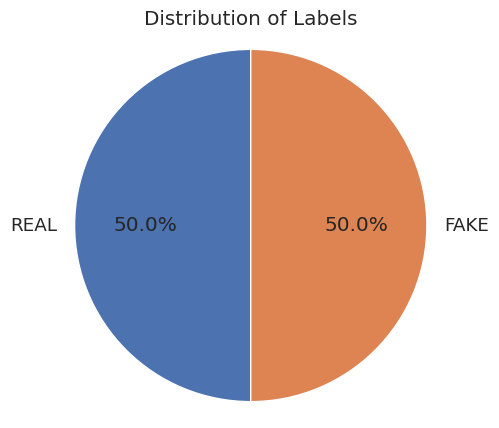

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

### Feature Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import entropy, pearsonr


# Encode the LABEL column to binary (REAL = 1, FAKE = 0)
le = LabelEncoder()
data['LABEL'] = le.fit_transform(data['LABEL'])

# Separate features and target
features = data.drop(columns=['LABEL'])
target = data['LABEL']

In [ ]:
# Compute Relative Entropy (KL divergence from empirical class distributions per feature bin)
def compute_relative_entropy(feature_col, target_col, bins=10):
    # Bin the feature
    binned_feature = pd.qcut(feature_col, q=bins, duplicates='drop')
    joint_dist = pd.crosstab(binned_feature, target_col, normalize='all')
    marginal_feature = joint_dist.sum(axis=1)
    marginal_target = joint_dist.sum(axis=0)

    rel_entropy = 0
    for i in joint_dist.index:
        for j in joint_dist.columns:
            p_ij = joint_dist.loc[i, j]
            if p_ij > 0:
                p_i = marginal_feature[i]
                p_j = marginal_target[j]
                rel_entropy += p_ij * np.log(p_ij / (p_i * p_j))
    return rel_entropy

In [ ]:
# Calculate relative entropy and Pearson's correlation for each feature
rel_entropies = []
pearson_coeffs = []

for col in features.columns:
    rel_entropy_value = compute_relative_entropy(features[col], target)
    rel_entropies.append(rel_entropy_value)

    # Pearson correlation with label
    corr, _ = pearsonr(features[col], target)
    pearson_coeffs.append(abs(corr))  # Use absolute value for visualization

In [ ]:
feature_names = features.columns
x = np.arange(len(feature_names))

# Combine the data into a DataFrame for easier sorting
metrics_df = pd.DataFrame({
    'Feature': features.columns,
    'Relative Entropy': rel_entropies,
    "Pearson's Correlation Coefficient": pearson_coeffs
})

# Sort by Pearson's Correlation Coefficient in descending order
metrics_df_sorted = metrics_df.sort_values(by="Pearson's Correlation Coefficient", ascending=False).reset_index(drop=True)

# Plot again with sorted features
x_sorted = np.arange(len(metrics_df_sorted))

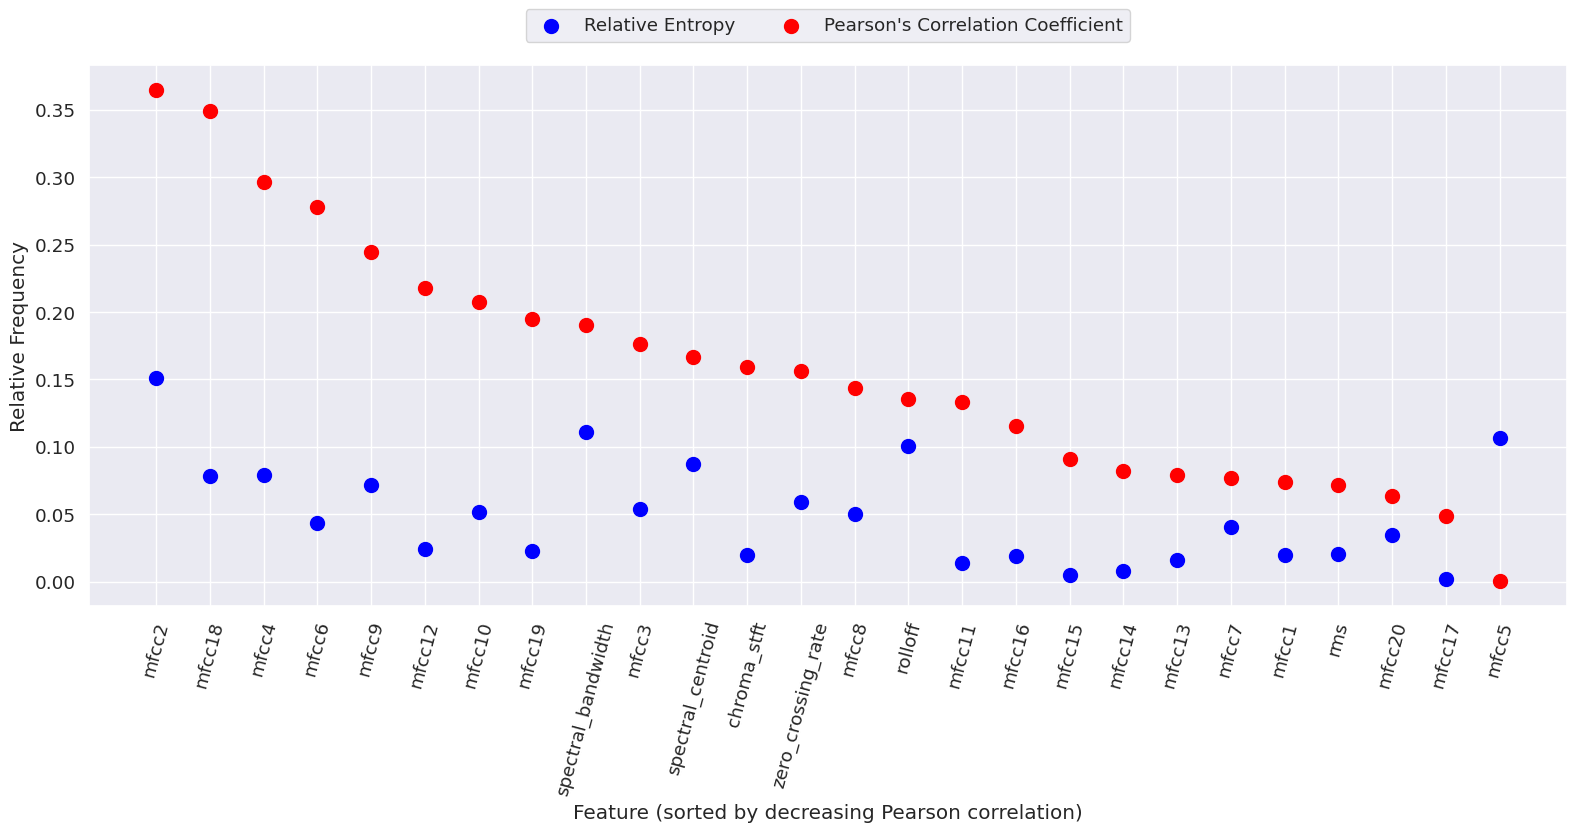

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(x_sorted, metrics_df_sorted['Relative Entropy'], color='blue', label="Relative Entropy", marker='o', s=100)
plt.scatter(x_sorted, metrics_df_sorted["Pearson's Correlation Coefficient"], color='red', label="Pearson's Correlation Coefficient", marker='o', s=100)
plt.xticks(x_sorted, metrics_df_sorted['Feature'], rotation=75)
plt.xlabel("Feature (sorted by decreasing Pearson correlation)")
plt.ylabel("Relative Frequency")
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Pipeline

#### 1. Data Splitting

In [ ]:
def split_data(X, y, test_size=0.2, val_size=0.2, random_state=42):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_size, stratify=y_trainval, random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

#### 2. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import ParameterGrid

# 2. Train and Evaluate a Single Model
def train_and_evaluate(model, param_grid, X_train, y_train, X_val, y_val, scoring='accuracy'):
    """
    Trains and evaluates a model with hyperparameter tuning.

    Args:
        model: The model object (e.g., LogisticRegression, RandomForestClassifier).
        param_grid: A dictionary or list of dictionaries containing the hyperparameters to tune.
        X_train: The training data.
        y_train: The training labels.
        X_val: The validation data.
        y_val: The validation labels.
        scoring: The scoring metric to use for evaluation (default: 'accuracy').

    Returns:
        A tuple containing:
            - The best trained model.
            - The best hyperparameters.
            - The best score achieved on the validation set.
    """

    best_model = None
    best_score = -np.inf  # Initialize with negative infinity to find the maximum score
    best_params = {}

    # Iterate through the parameter grid
    for params in ParameterGrid(param_grid):
        # Set the hyperparameters for the model
        model.set_params(**params)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        val_preds = model.predict(X_val)

        # Calculate the score using the specified scoring metric
        score = accuracy_score(y_val, val_preds) if scoring == 'accuracy' else roc_auc_score(y_val, val_preds)

        # Update the best model, score, and parameters if the current score is better
        if score > best_score:
            best_score = score
            best_model = model
            best_params = params

    # Return the best model, hyperparameters, and score
    return best_model, best_params, best_score

#### 3. Learning Curve

In [ ]:
def plot_learning_curve(model, X_train, y_train, title='Learning Curve'):
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy', n_jobs=-1)
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation')
    plt.title(title)
    plt.xlabel("Training size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

#### 4. Evaluation on Test Set

In [ ]:
def final_evaluation(model, X_test, y_test, model_name='Model'):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n📊 Test Evaluation: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

     # ROC Curve
    if y_probs is not None:
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc = roc_auc_score(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve: {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.grid()
        plt.show()

### Preparing the data

In [ ]:
# Defining the design matrix
X = data.drop('LABEL', axis=1)

# Encoding target variable : REAL = 1, FAKE = 0
y = data['LABEL'].map({'REAL': 1, 'FAKE': 0})

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

## Benchmark Models

### Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_params = {'C': [0.01, 0.1, 1, 10]}

best_logistic, best_params_logistic, score_logistic = train_and_evaluate(
    logistic_model, logistic_params, X_train, y_train, X_val, y_val
)

In [ ]:
best_logistic

LogisticRegression(C=10, max_iter=1000)

In [ ]:
print(f"Val Accuracy: {score_logistic:.4f}")

Val Accuracy: 0.8249


In [ ]:
import pickle

# Save the best logistic regression model to a pickle file
with open('best_lr.pkl', 'wb') as file:
    pickle.dump(best_logistic, file)

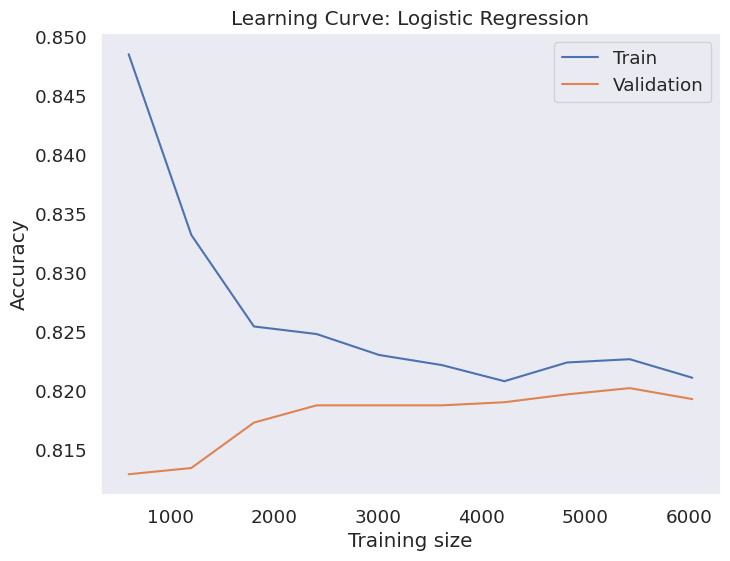

In [ ]:
plot_learning_curve(best_logistic, X_train, y_train, title='Learning Curve: Logistic Regression')


📊 Test Evaluation: Logistic Regression
Accuracy: 0.8247028862478778
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1178
           1       0.82      0.84      0.83      1178

    accuracy                           0.82      2356
   macro avg       0.82      0.82      0.82      2356
weighted avg       0.82      0.82      0.82      2356



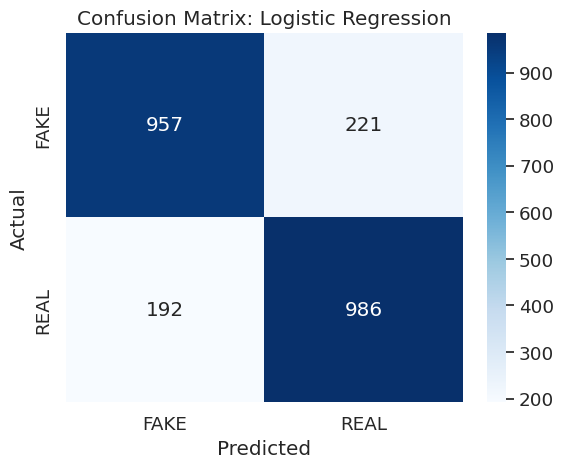

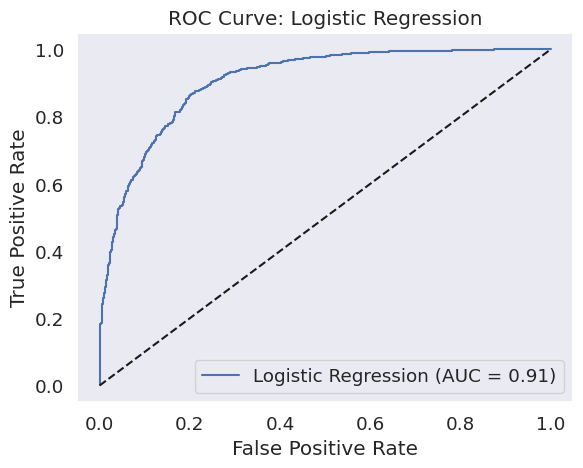

In [ ]:
final_evaluation(best_logistic, X_test, y_test, model_name='Logistic Regression')

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_model

GaussianNB()

In [ ]:
import pickle

# Save the best logistic regression model to a pickle file
with open('best_nb.pkl', 'wb') as file:
    pickle.dump(nb_model, file)

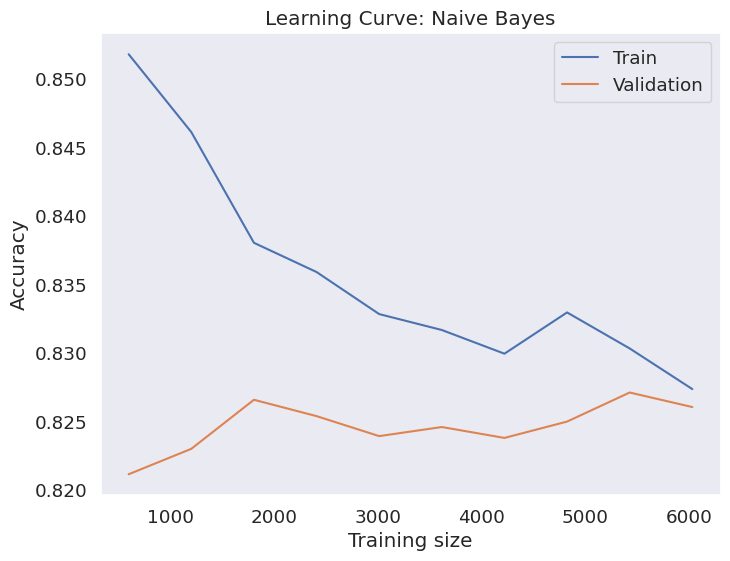

In [ ]:
plot_learning_curve(nb_model, X_train, y_train, title='Learning Curve: Naive Bayes')


📊 Test Evaluation: Naive Bayes
Accuracy: 0.8314940577249575
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1178
           1       0.87      0.79      0.82      1178

    accuracy                           0.83      2356
   macro avg       0.83      0.83      0.83      2356
weighted avg       0.83      0.83      0.83      2356



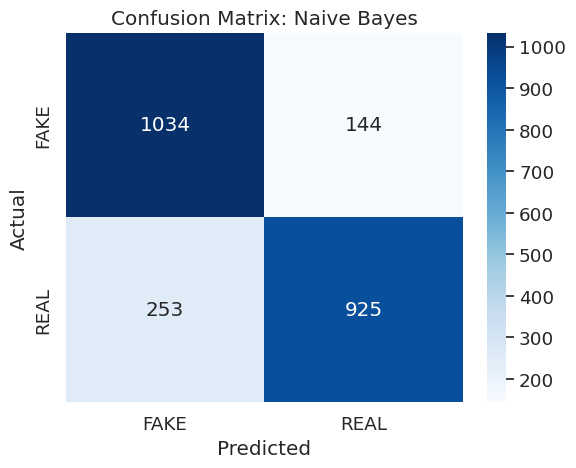

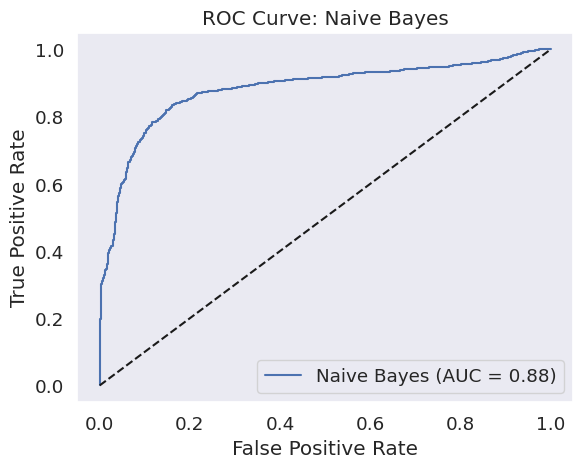

In [ ]:
final_evaluation(nb_model, X_test, y_test, model_name='Naive Bayes')

### SVM

In [ ]:
svm_model = SVC(probability=True)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

best_svm, best_params_svm, score_svm = train_and_evaluate(
    svm_model, svm_params, X_train, y_train, X_val, y_val
)

In [ ]:
best_svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
print(f"Val Accuracy: {score_svm:.4f}")

Val Accuracy: 0.7921


In [ ]:
import pickle

# Save the best logistic regression model to a pickle file
with open('best_svm.pkl', 'wb') as file:
    pickle.dump(best_svm, file)

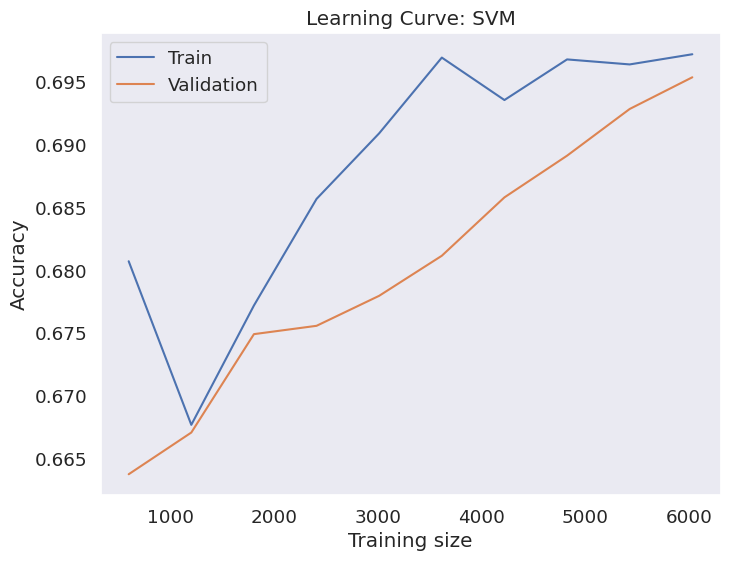

In [ ]:
plot_learning_curve(best_svm, X_train, y_train, title='Learning Curve: SVM')


📊 Test Evaluation: SVM
Accuracy: 0.7215619694397284
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1178
           1       0.80      0.59      0.68      1178

    accuracy                           0.72      2356
   macro avg       0.74      0.72      0.72      2356
weighted avg       0.74      0.72      0.72      2356



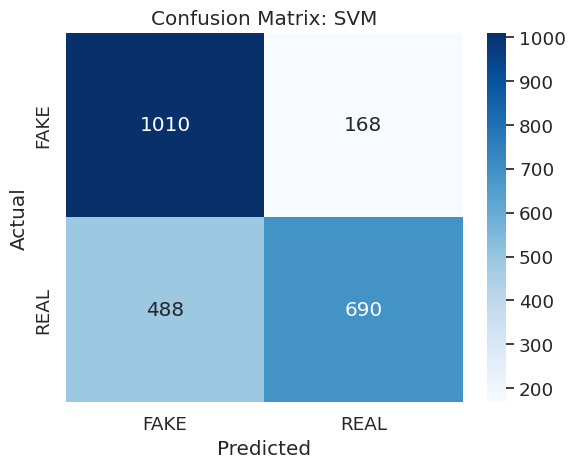

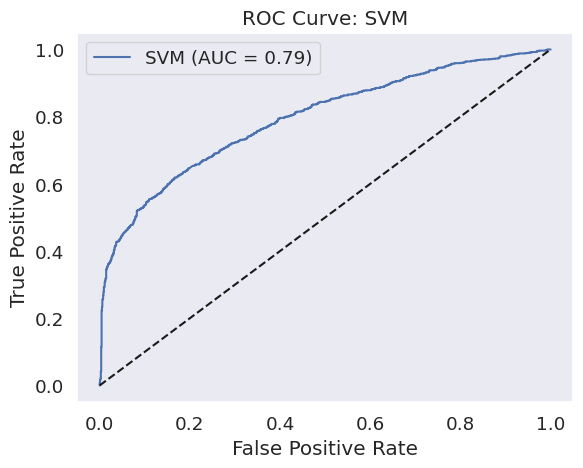

In [ ]:
final_evaluation(best_svm, X_test, y_test, model_name='SVM')

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

best_rf, best_params_rf, score_rf = train_and_evaluate(
    rf_model, rf_params, X_train, y_train, X_val, y_val
)

In [ ]:
print(f"Val Accuracy: {score_rf:.4f}")

Val Accuracy: 0.9899


In [ ]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
import pickle

# Save the best logistic regression model to a pickle file
with open('best_rf.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

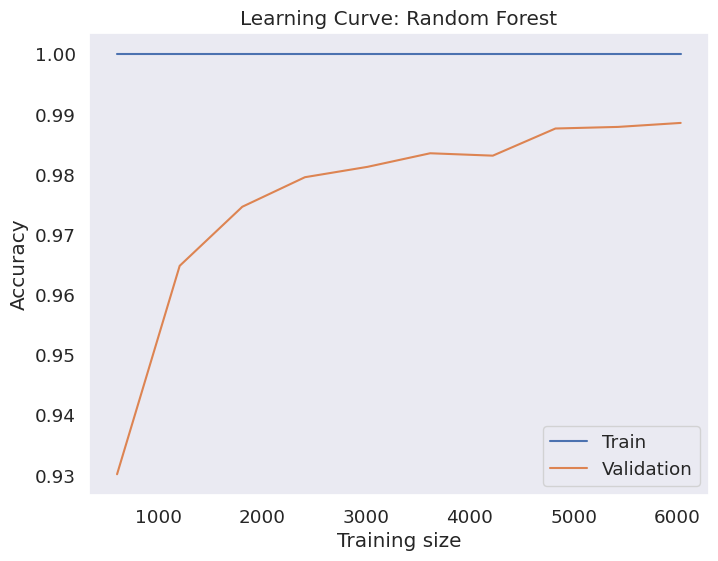

In [ ]:
plot_learning_curve(best_xg, X_train, y_train, title='Learning Curve: Random Forest')


📊 Test Evaluation: Random Forest
Accuracy: 0.9902376910016978
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1178
           1       1.00      0.98      0.99      1178

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356



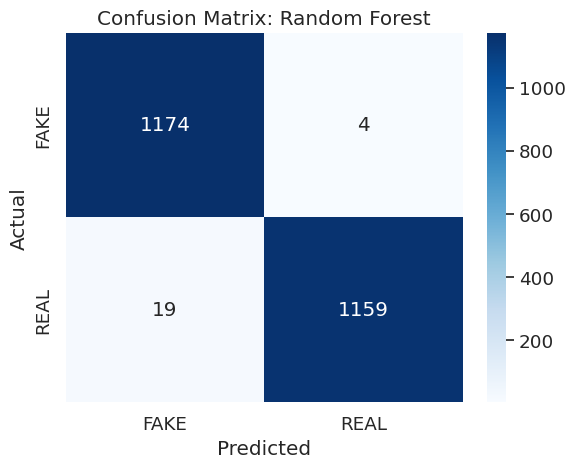

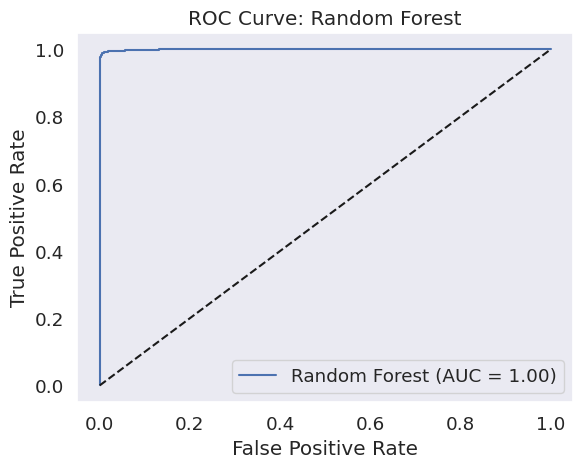

In [ ]:
final_evaluation(best_rf, X_test, y_test, model_name='Random Forest')

### XgBoost

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

best_xgb, best_params_xgb, score_xgb = train_and_evaluate(
    xgb_model, xgb_params, X_train, y_train, X_val, y_val
)

In [ ]:
best_xg

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
print(f"Val Accuracy: {score_xgb:.4f}")

Val Accuracy: 0.9915


In [ ]:
import pickle

# Save the best logistic regression model to a pickle file
with open('best_xg.pkl', 'wb') as file:
    pickle.dump(best_xg, file)

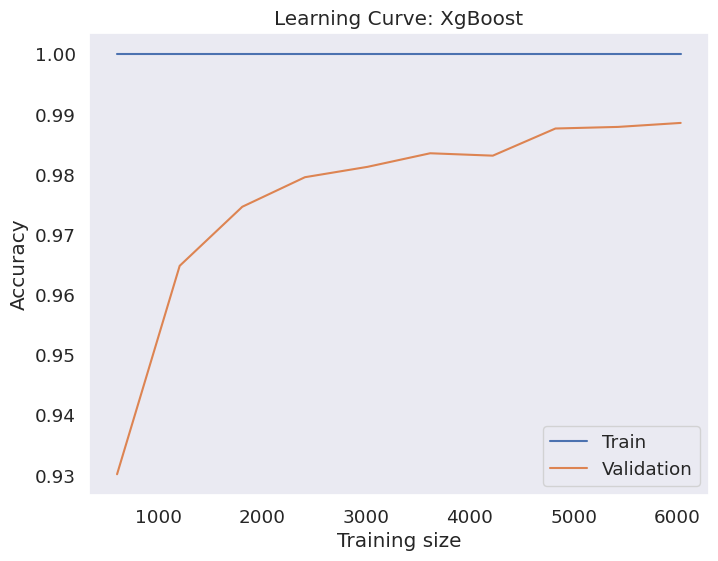

In [ ]:
plot_learning_curve(best_xg, X_train, y_train, title='Learning Curve: XgBoost')


📊 Test Evaluation: XgBoost
Accuracy: 0.9902376910016978
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1178
           1       1.00      0.98      0.99      1178

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356



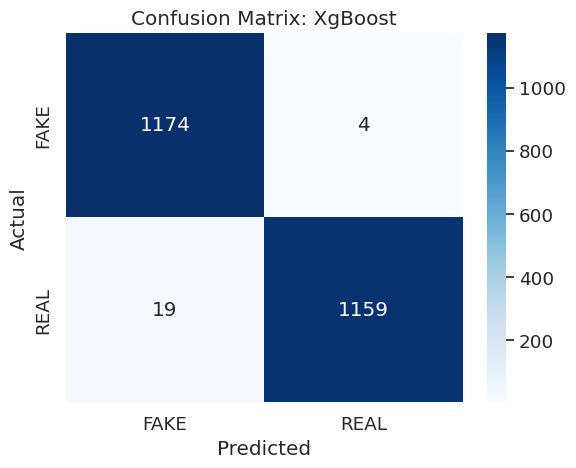

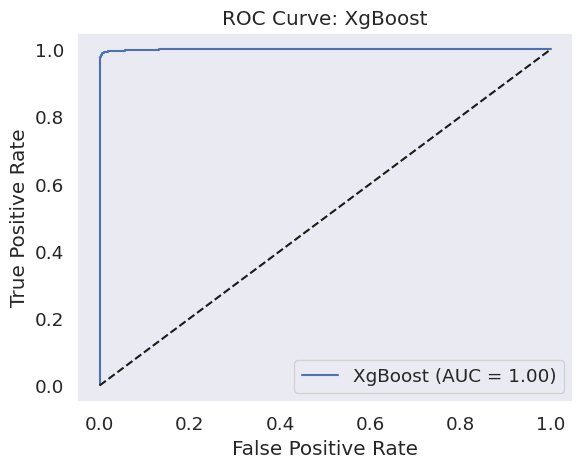

In [ ]:
final_evaluation(best_xg, X_test, y_test, model_name='XgBoost')

## Comparision

In [ ]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score

# Load the saved best models
model_files = {
    'Logistic Regression': 'best_lr.pkl',
    'Naive Bayes': 'best_nb.pkl',
    'SVM': 'best_svm.pkl',
    'Random Forest': 'best_rf.pkl',
    'XGBoost': 'best_xg.pkl'
}

results = []
for model_name, file_name in model_files.items():
    try:
        with open(file_name, 'rb') as file:
            model = pickle.load(file)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'Model': model_name, 'Accuracy': accuracy})
    except FileNotFoundError:
        print(f"Warning: Model file '{file_name}' not found. Skipping...")

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame as a table
results_df.set_index('Model', inplace=True)
results_df

,Accuracy
Model,
Logistic Regression,0.824703
Naive Bayes,0.831494
SVM,0.721562
Random Forest,0.983871
XGBoost,0.990238


## Developing App

### Flask App

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken '2oke8fW3mNa1hgF2PacK2Mddbrs_5gd6AgQLnTCeA5n9ALSs'  # Replace <YOUR_AUTHTOKEN> with your actual token

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, render_template_string
from pyngrok import ngrok
import joblib
import os
import librosa
import numpy as np

app = Flask(__name__)

# Load trained model
model = joblib.load('/content/best_xg.pkl')

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfccs, axis=1)
        mfcc_std = np.std(mfccs, axis=1)
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
        features = np.concatenate([mfcc_mean, mfcc_std[:10], [spectral_centroid, spectral_rolloff, zero_crossing_rate]])
        return features
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

HTML_TEMPLATE = '''
<!DOCTYPE html>
<html>
<head>
    <title>Real vs. Fake Speech Detection</title>
    <style>
        body { font-family: Arial, sans-serif; text-align: center; margin-top: 50px; background-color: #f4f4f9; }
        h1 { color: #333; }
        .upload-form { margin: 20px; }
        .result { margin-top: 20px; font-size: 18px; padding: 20px; background-color: #fff; border-radius: 8px; box-shadow: 0 0 10px rgba(0,0,0,0.1); }
        .confidence-bar { width: 300px; height: 20px; background-color: #e0e0e0; border-radius: 10px; margin: 10px auto; overflow: hidden; }
        .confidence-fill { height: 100%; background-color: #4CAF50; transition: width 0.5s; }
        input[type="file"], input[type="submit"] { padding: 10px; margin: 10px; }
        input[type="submit"] { background-color: #4CAF50; color: white; border: none; border-radius: 5px; cursor: pointer; }
        input[type="submit"]:hover { background-color: #45a049; }
    </style>
</head>
<body>
    <h1>Real vs. Fake Speech Detection</h1>
    <form class="upload-form" method="post" enctype="multipart/form-data">
        <input type="file" name="audio" accept=".wav" required>
        <input type="submit" value="Classify Audio">
    </form>
    {% if result %}
    <div class="result">
        <p>Prediction: <strong>{{ result }}</strong></p>
        <p>Confidence (Fake): {{ confidence }}%</p>
        <div class="confidence-bar">
            <div class="confidence-fill" style="width: {{ confidence }}%;"></div>
        </div>
    </div>
    {% endif %}
</body>
</html>
'''

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        if 'audio' not in request.files:
            return render_template_string(HTML_TEMPLATE, result="No file uploaded")
        file = request.files['audio']
        if file.filename == '':
            return render_template_string(HTML_TEMPLATE, result="No file selected")
        if file and file.filename.endswith('.wav'):
            file_path = os.path.join('/content', file.filename)
            file.save(file_path)
            features = extract_features(file_path)
            if features is None:
                return render_template_string(HTML_TEMPLATE, result="Error processing audio")
            prediction = model.predict([features])[0]
            probabilities = model.predict_proba([features])[0]
            label = 'Fake' if prediction == 1 else 'Real'
            confidence = probabilities[1] * 100
            return render_template_string(HTML_TEMPLATE, result=label, confidence=f"{confidence:.2f}")
        return render_template_string(HTML_TEMPLATE, result="Invalid file format")
    return render_template_string(HTML_TEMPLATE)

public_url = ngrok.connect(5001)
print(f"Flask app running at: {public_url}")
app.run(port=5001)

Flask app running at: NgrokTunnel: "https://0ae8-34-48-17-8.ngrok-free.app" -> "http://localhost:5001"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [07/May/2025 11:00:33] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/May/2025 11:00:33] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/May/2025 11:56:10] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/May/2025 11:56:56] "POST / HTTP/1.1" 200 -


---
                                                         
                                                          
                                                           
                                                            
                                                             Thank You :)